# How to use Plotly as Pandas Plotting Backend
## Make interactive plots without having to learn a new library
<img src='images/sea.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@eli-burdette-251528?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Eli Burdette</a>
        on 
        <a href='https://www.pexels.com/photo/silhouette-of-man-during-sunrise-762528/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

### Setup

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

pd.set_option('plotting.backend', 'plotly')

### Introduction To Plotly

Libraries in the [Scipy Stack](https://scipy.org/stackspec.html) work seamlessly together. In terms of visualization, the relationship between `pandas` and `maltplotlib` clearly stands out. Without even importing it, you can generate `matplotlib` plots with the [plotting API](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) of `pandas`. Just use the `.plot` keyword on any `pandas` DataFrame or Series and you will get access to most of the functionality of `maptlotlib`:

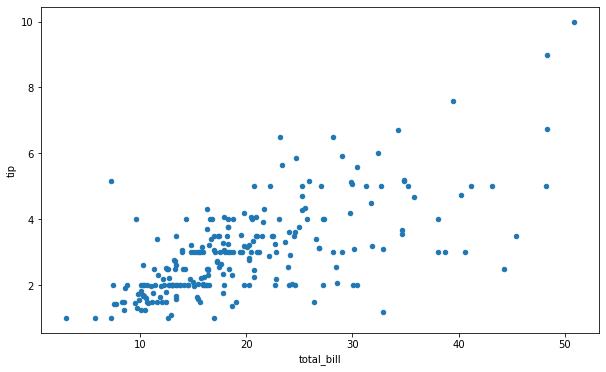

In [16]:
pd.set_option('plotting.backend', 'matplotlib')
tips.plot.scatter(x="total_bill", y="tip", figsize=(10, 6));

Although `matplotlib` is awesome and still the most widely-used visualization library, in recent years, there has been a clear trend to move away from old-fashioned static plots `matplotlib` offers. Specifically, libraries like `plotly`, `bokeh` and `altair` now offer interactive plots for boring Jupyter notebooks. This allows you to zoom in, pan and interact with the generated plot in many ways making data analysis more enjoyable and informative.

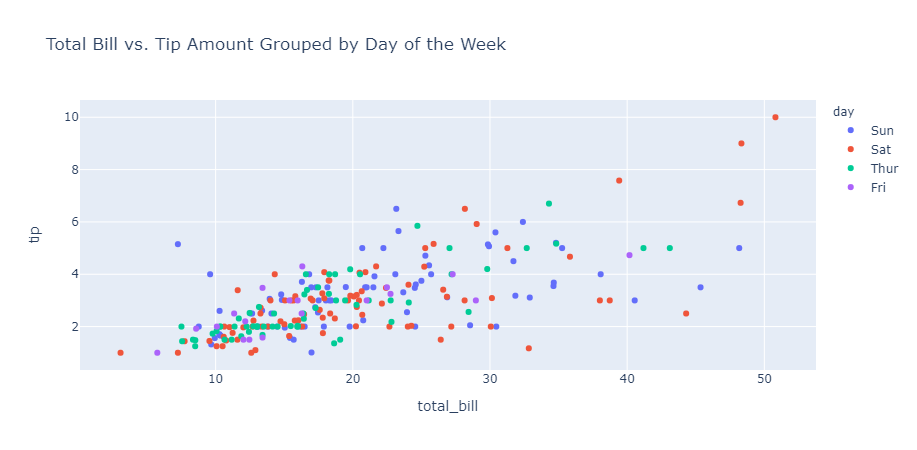

In [14]:
tips = px.data.tips()

tips.plot.scatter(x='total_bill', y='tip', color='day', 
                  title='Total Bill vs. Tip Amount Grouped by Day of the Week')

However, learning a completely new library just for the sake of interactivity may not be worth the pain. Fortunately, as of version 0.25, `pandas` has a mechanism for changing its plotting backend. This means you can enjoy most benefits of `plotly` without having to learn a lot of new syntax.

In this post, we will focus on how to get the most out of `pandas` plotting API with `plotly` as backend.

### Installation, Jupyter and Pandas Setup

Even though you don't have to import `plotly` for this to work, you have to install it in your workspace. Also, there are a few other steps required so that `plotly` charts can be rendered on both Jupyter Lab and classic Jupyter.

You can install the library both with `pip` or `conda`:

```python
pip install plotly==4.14.3
conda install -c plotly plotly=4.14.3
```

For classic Jupyter, run these additional commands to fully set up `plotly`:

```python
# pip
pip install "notebook>=5.3" "ipywidgets>=7.5"

# conda
conda install "notebook>=5.3" "ipywidgets>=7.5"
```

For Jupyter Lab support, run these commands:

``` python
# pip
pip install jupyterlab "ipywidgets>=7.5"

# conda
conda install jupyterlab "ipywidgets>=7.5"

# JupyterLab renderer support
jupyter labextension install jupyterlab-plotly@4.14.3

# Jupyter widgets extension
jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.14.3
```

All the above steps ensure that `plotly` runs in Jupyter without a hitch. Now on to switching the backend. If you run the below command, you will see the current plotting backend of `pandas`:

In [17]:
pd.get_option('plotting.backend')

'matplotlib'

To change this to `plotly`, just run:

In [18]:
# Set plotly as backend
pd.set_option('plotting.backend', 'plotly')

# Check
pd.get_option('plotting.backend')

'plotly'

> You can change all default global `pandas` settings with a few commands like above. There is so much you can do with them that I have another article for it. Check it out [here](https://towardsdev.com/tricks-and-best-practices-from-kaggle-794a5914480f?source=your_stories_page-------------------------------------).

### Creating Different Plots

Pandas supports 13 types of `plotly` plots which can all be triggered using the `kind` keyword argument while calling `plot` on any DataFrame or a Series. 

Pandas also supports dot notation to trigger plots but this method is not available for all plots. Here is a complete list of them divided by the two methods:
- only with `kind` keyword: `violin, strip, funnel, density_heatmap, density_contour and imshow`
- either `kind` or dot notation: `scatter, line, area, bar, barh, hist, box` plus the above plots

Today, all the plots will be on the Tips dataset that is built-in to `plotly`. Let's load it:

In [19]:
import plotly.express as px

tips = px.data.tips()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Let's create a few plots to understand the dataset better:

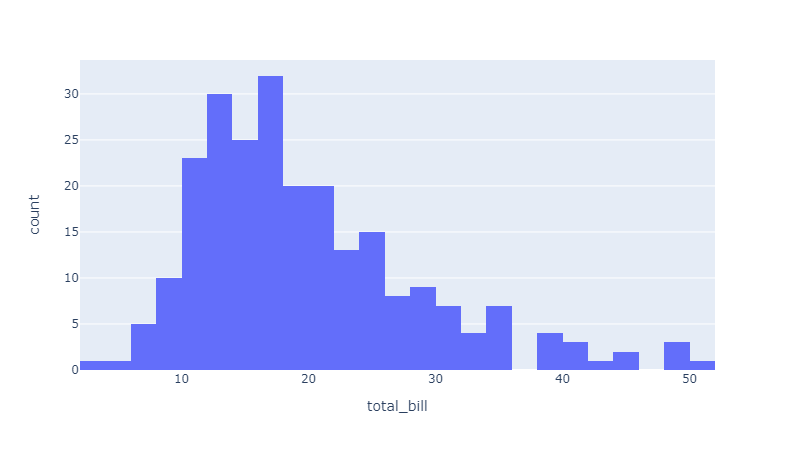

In [21]:
tips.plot.hist(x='total_bill')

From the above histogram, which was created using dot notation, we can see that most of the bills were between 10 and 20$. Let's see if larger bills are correlated with the tip amount with a scatterplot:

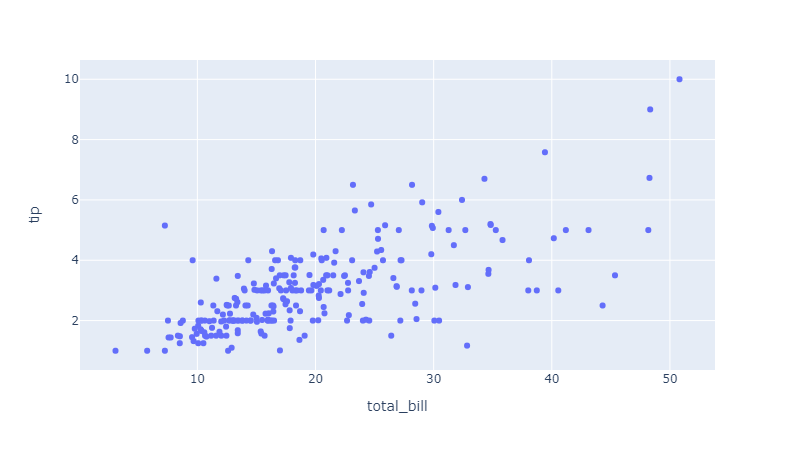

In [22]:
tips.plot.scatter(x='total_bill', y='tip')

Again with dot notation, scatterplot shows a positive trend between bill and tip amounts. 

Let's create a bar chart to see which week of the day brought more revenue for the restaurant:

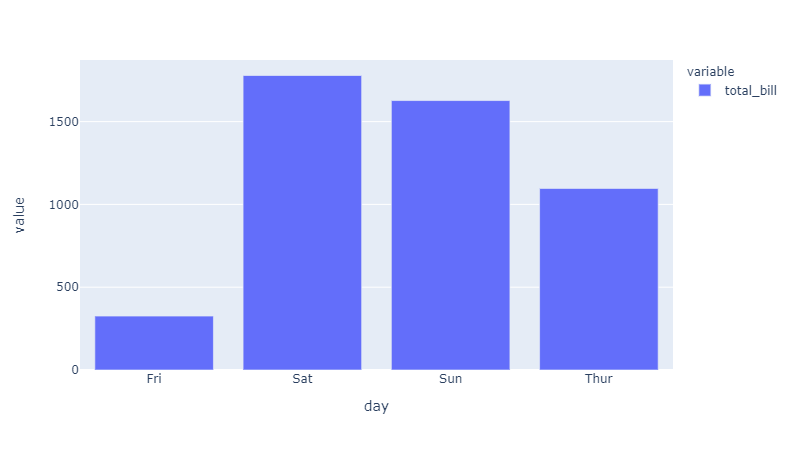

In [25]:
tips.groupby('day')['total_bill'].sum().plot(kind='bar')

With a bit of `pandas` manipulation with `groupby`, we can see that the weekends are clear winners in revenue. We can do the same for the time of the day:

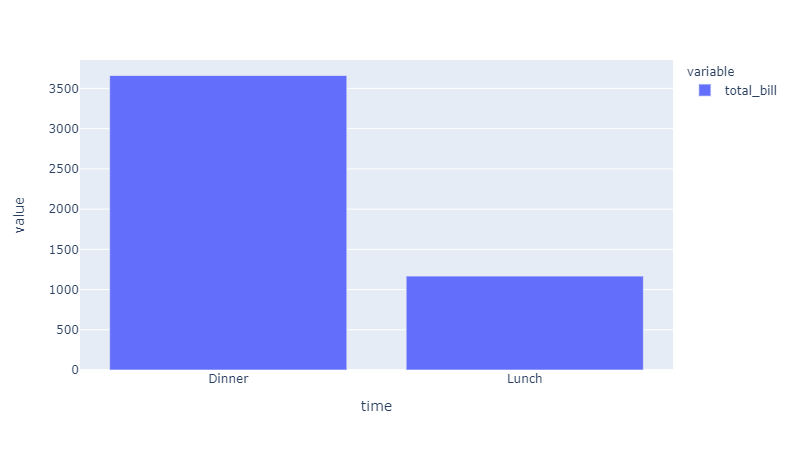

In [26]:
tips.groupby('time')['total_bill'].sum().plot(kind='bar')

Not surprisingly, there were more dinner-time clients.

So far, we have only looked two variables at a time. Whenever possible, you can always add more variables depending on your plot. For example, using `color`, `symbol` and `size` keyword arguments, you can encode more variables using different colors, symbols and varying sizes for the dots of scatterplot:

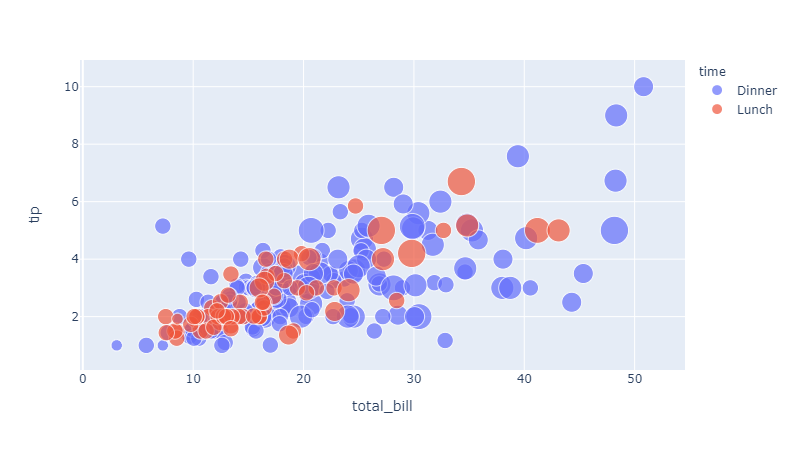

In [28]:
tips.plot.scatter(
    x='total_bill', y='tip',
    color='time', size='size'
)

Above is a scatterplot with 4 variables. The color of the dots represent the time of the day while the size indicates the table size of each order in the restaurant. 

In a nutshell, you will basically get access to almost all functionality of the plot if it is available in the pandas plotting API. To control your plots, just search the `plotly` documentation for the plot and you are set.